In [50]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt

In [51]:
tpm = pd.read_excel("tpm.xlsx", header=None, sheet_name="TPM")
tpm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0.946581,0.041599,0.000000,0.011587,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000232
1,0,0.958544,0.000000,0.029636,0.011587,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000232
2,0,0.000000,0.000000,0.000000,0.794711,0.197922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007077,0.0,0.0,0.000290
3,0,0.000000,0.000000,0.000000,0.794711,0.197922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007077,0.0,0.0,0.000290
4,0,0.000000,0.000000,0.000000,0.794769,0.197922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007077,0.0,0.0,0.000232


In [52]:
tpm.shape

(18, 18)

In [53]:
tpm = tpm.to_numpy()

In [54]:
cost = pd.read_excel("tpm.xlsx", header=None, sheet_name="Cost Matrix")
c = cost.iloc[7]
c

0      1142.374401
1      1119.328497
2     16678.592492
3     16678.592492
4       297.465665
5      2516.404908
6      1765.269628
7     16677.003062
8     16677.003062
9       297.465665
10      773.103739
11      827.170607
12    16870.198719
13      297.465665
14    17775.500000
15    17775.500000
16    17775.500000
17        0.000000
Name: 7, dtype: float64

In [55]:
c = c.to_numpy()
c

array([ 1142.37440092,  1119.32849653, 16678.5924922 , 16678.5924922 ,
         297.46566546,  2516.40490786,  1765.26962798, 16677.00306153,
       16677.00306153,   297.46566546,   773.10373933,   827.17060732,
       16870.19871911,   297.46566546, 17775.5       , 17775.5       ,
       17775.5       ,     0.        ])

In [56]:
ac = np.eye(18)
mult = tpm.copy()

for _ in range(59):
    ac += mult
    mult = mult.dot(tpm)


In [57]:
ac[0][1]

20.955564429526483

In [58]:
average_cost = np.dot(c.T, ac)
average_cost

array([1.14237440e+03, 4.88110255e+04, 1.67261144e+04, 1.81196981e+04,
       1.39011859e+05, 5.58930004e+04, 1.10880149e+06, 1.99725969e+04,
       5.37791661e+04, 3.38374404e+05, 3.04823135e+05, 5.34886473e+06,
       1.21401300e+05, 8.00636598e+05, 9.58759769e+04, 1.04080584e+05,
       1.19205372e+05, 6.11168916e+04])

In [59]:
total_cost = average_cost.sum()
total_cost

8756636.316172997

In [60]:
np.random.seed(1234)

In [61]:
vector = np.random.normal(loc=total_cost, scale=0.1*total_cost, size=18)
vector

array([ 9169454.94371909,  7713742.2141784 , 10011205.7031884 ,
        8482858.42140929,  8125642.96901208,  9533492.63831915,
        9509346.62822494,  8199255.83268513,  8770381.05838193,
        6792798.66461753,  9763680.77537079,  9625247.37246592,
        9591427.58430432,  6986696.9798971 ,  8464096.91678834,
        8758491.29108483,  9111677.12300017,  9009783.61508287])

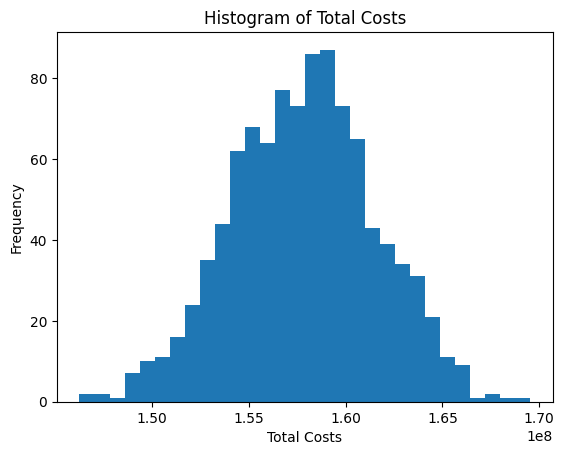

(157827215.966321, 3719904.626473573)

In [62]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

# Define parameters
iterations = 1000
mean = total_cost
std_dev = 0.1 * total_cost

# Perform Monte Carlo simulation
simulation_results = []
for _ in range(iterations):
    costs = np.random.normal(loc=mean, scale=std_dev, size=18)
    total_costs = np.sum(costs)
    simulation_results.append(total_costs)

# Calculate mean and standard deviation
mean_total_costs = np.mean(simulation_results)
std_dev_total_costs = np.std(simulation_results)

# Plot histogram
plt.hist(simulation_results, bins=30)
plt.xlabel('Total Costs')
plt.ylabel('Frequency')
plt.title('Histogram of Total Costs')
plt.show()

mean_total_costs, std_dev_total_costs
